**Ледяев А.А. 19.Б05-пу**


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from time import time
import timeit

**Задание погрешности, функции, графика.**

In [ ]:
EPS = (1.e-7) * 5 

In [ ]:
count_call = 0

In [ ]:
A = len("Ледяев")

In [ ]:
B = len("Антон")

In [ ]:
print("Исследуемая функция: e^({0}*x) - log({1}, x)".format(A, B))

Исследуемая функция: e^(6*x) - log(5, x)


In [ ]:
RESULTS = dict.fromkeys(['Пассивный поиск', 'Дихотомия', 'Золотое сечение', 'Фиббоначчи',
'Касательные', 'Ньютон-Рафсон', 'Секущие' ])

In [ ]:
def func_in_method(x):
  global count_call
  count_call = count_call + 1
  if x==0:
    res = np.inf
  else:
    res = math.exp(A*x) - math.log(x,B)
  return res

In [ ]:
def func(x):
  if x==0:
    res = np.inf
  else:
    res = math.exp(A*x) - math.log(x,B)
  return res

In [ ]:
def diff_func(x):
  global count_call
  count_call = count_call + 1
  if x==0:
    res = -np.inf
  else:
    res = -1 / (math.log(B) * x) + A * math.exp(A * x)
  return res

In [ ]:
def diff_2_func(x):
  global count_call
  count_call = count_call + 1
  if x==0:
    res = np.inf
  else: 
    res = 1 / (math.log(B) * x ** 2) + A ** 2 * math.exp(A * x)
  return res


In [ ]:
def func_show():
  x=np.arange(1e-2,0.1,1e-5)

  fig = plt.figure(figsize=(14,12),dpi = 80, facecolor='w', edgecolor='k')
  plt.title("Функция y(x)")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.grid()
  plt.plot(x,func(x))

**Метод пассивного поиска.**

In [ ]:
def passive_search():
  t1 = t2 = 0
  t1 = time()
  EPS_ps = (1.e-6) * 5
  a = 0
  b = 1
  k = int((b-a)/EPS_ps)
  print("необходимо {0} отрезков для достижения заданной точности в пассивном поиске".format(k))
  x = np.arange(a,b,(b-a)/k)
  y_min = np.inf
  x_min = np.inf
  for i in x:
    f = func_in_method(i)
    if f < y_min:
      y_min = f 
      x_min = i 
    if (count_call % 5000 == 0):
      print(x_min,y_min,f, count_call)  

  print("x= {0}, y = {1}".format('%.5f' % x_min, '%.3f' % y_min))
  t2 = time()

  RESULTS['Пассивный поиск'] = (t2-t1)*10**3
  return (count_call)

**Метод дихотомии.**

In [ ]:
def dichotomy():
  t1 = t2 = 0
  t1 = time()

  a = 0
  b = 1
  middle = 0.5
  delta = EPS
  k = 0
  while abs(b - a) > EPS:
    print(a,b, count_call)
    middle = (b+a)/2
    if func_in_method(middle + delta) > func_in_method(middle - delta):
      b = middle
    else:
      a = middle
    k += 1
  print(a,b,count_call)
  print("необходимо {0} итераций для достижения заданной точности в методе дихотомии".format(k))
  print("x = {0} y = {1}".format('%.5f'% middle, '%.3f'% func(middle)))

  t2 = time()
  RESULTS['Дихотомия'] = (t2-t1) * 10**3

  return count_call


**Метод золотого сечения.**

In [ ]:
def golden_ratio():
  t1 = t2 = 0
  a = 0
  b = 1
  k = 0 
  phi = (math.sqrt(5)-1)/2

  t1 = time()
  d = a + (b-a)*phi
  c = b - (b-a)*phi
  fc = func_in_method(c)
  fd = func_in_method(d)
  while abs(b - a) > 2*EPS:
    print(a,b,count_call)
    if fc < fd:
      b = d
      d = c
      c = b - (b - a)*phi
      fd = fc
      fc = func_in_method(c)
    else:
      a = c
      c = d
      d = a + (b-a)*phi
      fc = fd
      fd = func_in_method(d)
    k += 1
  print(a,b,count_call)
  print("необходимо {0} итераций для достижения заданной точности в методе золотого сечения".format(k))
  print("x = {0} y = {1}".format('%.5f'%c,'%.3f'%func(c)))

  t2 = time()
  RESULTS['Золотое сечение'] = (t2-t1) * 10**3
  return count_call

**Метод Фиббоначчи.**

In [ ]:
def Fibbonacci():
  t1 = t2 = 0

  a = 0 
  b = 1
  
  def fibbonacci(max_i, f = 1, s =1):
    while f < max_i:
      yield f
      f, s = s, f + s 
  fibs = []
  n = -2
  for f in fibbonacci((b-a)/EPS):
    fibs.append(f)
    n += 1
  t1 = time()

  i = 1
  c = a + (b-a) * fibs[n-i]/fibs[n+2-i]
  d = a + (b-a) * fibs[n+1-i]/fibs[n+2-i]
  fc = func_in_method(c)
  fd = func_in_method(d)
  for i in range(2,n):
    print (a,b,count_call)
    if fc < fd:
      b = d 
      d = c
      c = a + (b-a)*fibs[n-i] / fibs[n+2-i]
      fd = fc
      fc = func_in_method(c)
    else:
      a = c
      c = d 
      d = a + (b-a)*fibs[n+1-i]/fibs[n+2-i]
      fc = fd
      fd = func_in_method(d)
  print(a,b,count_call)
  print("необходимо {0} итераций для достижения заданной точности в методе Фиббоначи".format(n - 2))
  print("x = {0} y = {1}".format('%.5f' % c, '%.3f' % func(c)))

  t2 = time()

  RESULTS['Фиббоначчи'] = (t2-t1) * 10**3
  return count_call


**Метод касательных.**

In [ ]:
def tangents():
  t1 = t2 = 0
  t1 = time()
  a = 1.e-3
  b = 0.25
  k = 0
  df_a = diff_func(a)
  df_b = diff_func(b)
  fa = func_in_method(a)
  fb = func_in_method(b)

  while abs(b-a) > EPS:
    print(a,b,count_call)
    c = (fb - fa + df_a*a - df_b*b)/(df_a - df_b)
    df_c = diff_func(c)
    if df_c > 0:
      b = c 
      df_b = df_c 
      fb = func_in_method(c)
    elif df_c < 0:
      a = c 
      df_a = df_c 
      fa = func_in_method(c)
    else:
      break
    k += 1
  print(a,b,count_call)
  print("необходимо {0} итераций для достижения заданной точности в методе касательных".format(k))
  print("x = {0} y = {1}".format('%.5f' % c, '%.3f' % func(c)))

  t2 = time()
  RESULTS['Касательные'] = (t2-t1) * 10**3
  return count_call


**Метод Ньютона-Рафсона**

In [ ]:
def Newton_Raphson():
  t1 = t2 = 0
  t1 = time()

  c = 1.e-3
  c_prev = np.inf
  k = 0
  d = diff_func(c)
  while abs(c - c_prev) > EPS:
    print(c,count_call)
    c_prev, c = c, c - d / diff_2_func(c)
    d = diff_func(c)
    k += 1
  print(c,count_call)
  print("необходимо {0} итераций для достижения заданной точности в методе Нютона-Рафсона".format(k))
  print("x = {0} y = {1}".format('%.5f' % c, '%.3f' % func(c)))

  t2 = time()
  print(t1,t2)
  
  RESULTS['Ньютон-Рафсон'] = (t2-t1) * 10**3
  return count_call

**Метод секущих.**

In [ ]:
def secants():
  t1 = t2 = 0
  t1 = time()

  a1 = 1.e-3
  a2 = 5* 1.e-3

  k = 0
  d1 = diff_func(a1)
  d2 = diff_func(a2)

  while abs(a2-a1) > EPS:
    print(a1,a2,count_call)
    a1, a2 = a2, a2 - (a2 - a1)/ (d2-d1)*d2
    d1 = d2
    d2 = diff_func(a2)
    k += 1
  print(a1,a2,count_call)
  print("необходимо {0} итераций для достижения заданной точности в методе секущих".format(k))
  print("x = {0} y = {1}".format('%.5f' % a1, '%.3f' % func(a1)))

  t2 = time()
  
  RESULTS['Секущие'] = (t2-t1) * 10**3
  return count_call

**Вывод результатов с методом пассивного поиска.**

In [ ]:
def res_show():
  fig, ax = plt.subplots()

  for x, y in zip(RESULTS.items(), calls):
    ax.bar(x[0],y)
  
  plt.xlabel('Методы')
  plt.ylabel('Количество вызовов функции')

  ax.set_facecolor('seashell')
  fig.set_facecolor('floralwhite')
  fig.set_figwidth(10)
  fig.set_figheight(5)

  rects = ax.patches

  for rect, x in zip(rects, RESULTS.items()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, "{:.1f}ms".format(x[1]), ha='center', va='bottom')
  
  plt.show()

**Вывод результатов без метода пассивного поиска.**

In [ ]:
def res_show2():
  fig, ax = plt.subplots()
  RESULTS.pop('Пассивный поиск')
  calls.pop(0)
  labels = [i for i in calls]

  for x,y in zip(RESULTS.items(),calls):
    ax.bar(x[0],y)
  
  plt.ylabel('Количество вызовов функции')
  plt.xlabel('Методы')

  ax.set_facecolor('seashell')
  fig.set_facecolor('floralwhite')
  fig.set_figwidth(10)
  fig.set_figheight(5)

  rects = ax.patches

  for rect, x in zip(rects, RESULTS.items()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, "{:.3f}ms".format(x[1]), ha='center', va='bottom')

  plt.show()

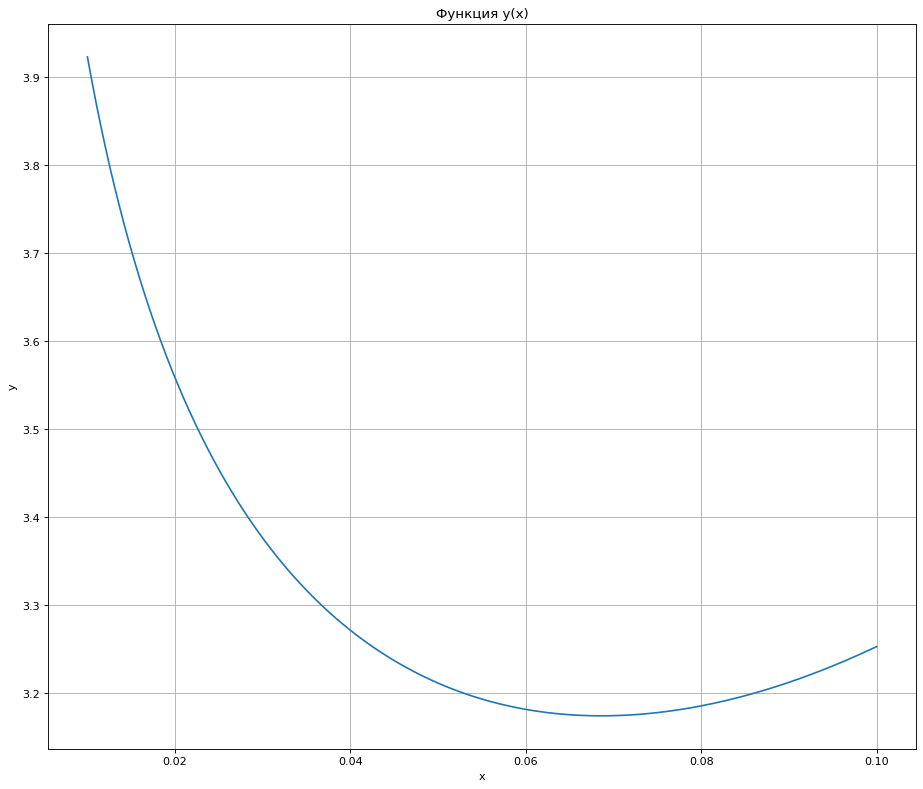

In [ ]:
func = np.vectorize(func)
func_show() 

**Выполнение методов и подсчет итераций.**

In [ ]:
calls = []
print("Пассивный поиск")
a = passive_search()
calls.append(a)
print("Использовалось {0} вызовов функции".format(a))

count_call = 0 
print("Дихотомия")
a = dichotomy()
calls.append(a)
print("Использовалось {0} вызовов функции".format(a))

count_call = 0 
print("Золотое сечение")
a = golden_ratio()
calls.append(a)
print("Использовалось {0} вызовов функции".format(a))

count_call = 0
print("Метод Фиббоначчи")
a = Fibbonacci()
calls.append(a)
print("Использовалось {0} вызовов функции".format(a))

count_call = 0
print("Метода касательных")
a = tangents()
calls.append(a)
print("Использовалось {0} вызовов функции".format(a))

count_call = 0
print("Метод Ньютона-Рафсона")
a = Newton_Raphson()
calls.append(a)
print("Использовалось {0} вызовов функции".format(a))

count_call = 0
print("Метод секущих")
a = secants()
calls.append(a)
print("Использовалось {0} вызовов функции".format(a))

Пассивный поиск
необходимо 200000 отрезков для достижения заданной точности в пассивном поиске
0.024995000000000003 3.4539533418592683 3.4539533418592683 5000
0.049995000000000005 3.2112335651663297 3.2112335651663297 10000
0.06861 3.174074421727923 3.177730040274308 15000
0.06861 3.174074421727923 3.2527717632432585 20000
0.06861 3.174074421727923 3.4089910356794597 25000
0.06861 3.174074421727923 3.6382969573409056 30000
0.06861 3.174074421727923 3.9405508615938767 35000
0.06861 3.174074421727923 4.320032854290437 40000
0.06861 3.174074421727923 4.784140902511495 45000
0.06861 3.174074421727923 5.342920164652441 50000
0.06861 3.174074421727923 6.008968489044864 55000
0.06861 3.174074421727923 6.797546696967276 60000
0.06861 3.174074421727923 7.7268233152503765 65000
0.06861 3.174074421727923 8.818224968446387 70000
0.06861 3.174074421727923 10.096882972808094 75000
0.06861 3.174074421727923 11.592176898972395 80000
0.06861 3.174074421727923 13.338382131676044 85000
0.06861 3.17407442

**Итоговые графики.**

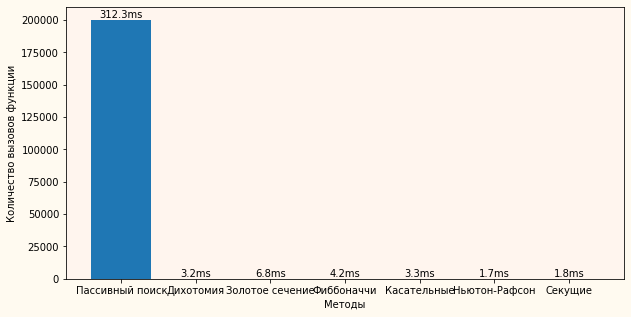

In [ ]:
res_show()

In [ ]:
print(RESULTS)

{'Пассивный поиск': 312.26253509521484, 'Дихотомия': 3.1538009643554688, 'Золотое сечение': 6.788015365600586, 'Фиббоначчи': 4.173040390014648, 'Касательные': 3.2701492309570312, 'Ньютон-Рафсон': 1.6965866088867188, 'Секущие': 1.8265247344970703}


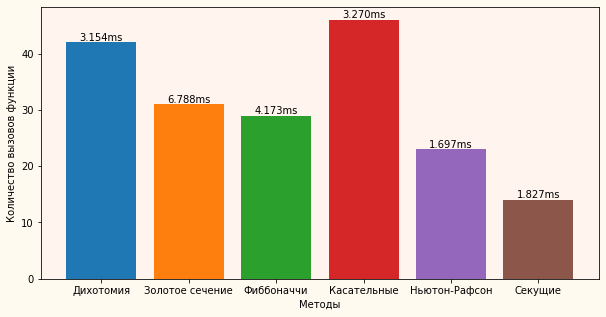

In [ ]:
res_show2()

Самыми эффективными по времени и количеству вызовов функций оказались методы Ньютона-Рафсона и секущих. 